<a href="https://colab.research.google.com/github/sameer-karim/w207-final-project/blob/project/Car_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate

from google.colab import files
uploaded = files.upload()

Saving car_price_prediction.csv to car_price_prediction (1).csv


In [3]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

In [15]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
10265,26556126,157,-,ROLLS-ROYCE,Phantom,1939,Cabriolet,Yes,Petrol,5,129000,8.0,Automatic,Rear,04-May,Left wheel,Silver,0
15613,41720592,200,-,ROLLS-ROYCE,Phantom,1939,Limousine,Yes,Petrol,2.2,169000,4.0,Manual,Rear,04-May,Left wheel,White,0
11219,20746880,157,-,MERCEDES-BENZ,S 500,1939,Limousine,Yes,Petrol,2.4,126000,4.0,Automatic,Rear,04-May,Left wheel,White,0
6607,32171534,119172,-,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000,4.0,Automatic,Rear,04-May,Left wheel,White,0
12849,38169002,150,-,BMW,340,1947,Limousine,No,Petrol,2,165000,6.0,Manual,Rear,04-May,Left wheel,White,0


In [17]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [18]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

### Data Cleaning & Exploration

In [4]:
# Change the 'Mileage' column from str to int
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)

In [5]:
# Get the summary statistics
summary = df.describe().round(2)

# Create a list of the headers and rows
headers = summary.columns.tolist()
rows = summary.reset_index().values.tolist()

# Print the formatted table
print(tabulate(rows, headers=headers, tablefmt='pretty'))

+-------+-------------+------------+------------+--------------+-----------+---------+
|       |     ID      |   Price    | Prod. year |   Mileage    | Cylinders | Airbags |
+-------+-------------+------------+------------+--------------+-----------+---------+
| count |   19237.0   |  19237.0   |  19237.0   |   19237.0    |  19237.0  | 19237.0 |
| mean  | 45576535.89 |  18555.93  |  2010.91   |  1532235.69  |   4.58    |  6.58   |
|  std  |  936591.42  | 190581.27  |    5.67    | 48403869.38  |    1.2    |  4.32   |
|  min  | 20746880.0  |    1.0     |   1939.0   |     0.0      |    1.0    |   0.0   |
|  25%  | 45698374.0  |   5331.0   |   2009.0   |   70139.0    |    4.0    |   4.0   |
|  50%  | 45772308.0  |  13172.0   |   2012.0   |   126000.0   |    4.0    |   6.0   |
|  75%  | 45802036.0  |  22075.0   |   2015.0   |   188888.0   |    4.0    |  12.0   |
|  max  | 45816654.0  | 26307500.0 |   2020.0   | 2147483647.0 |   16.0    |  16.0   |
+-------+-------------+------------+-------

In [6]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Visualizations

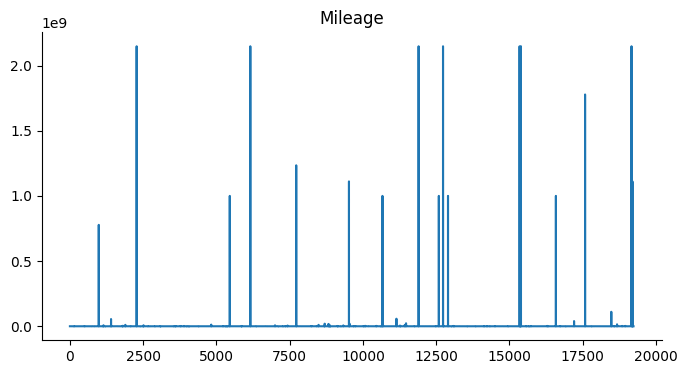

In [7]:
# @title Mileage
from matplotlib import pyplot as plt

df['Mileage'].plot(kind='line', figsize=(8, 4), title='Mileage')
plt.gca().spines[['top', 'right']].set_visible(False)

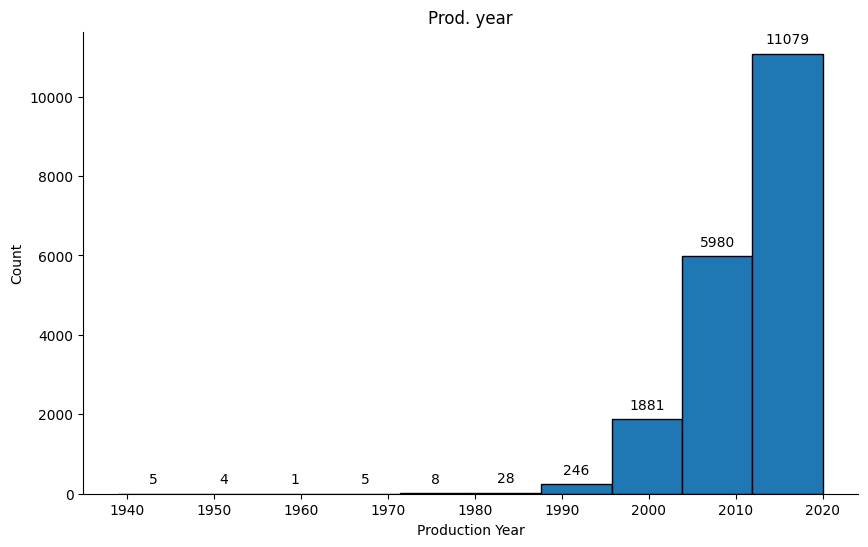

In [8]:
# Prod. year

from matplotlib import pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
hist = df['Prod. year'].plot(kind='hist', bins=10, title='Prod. year', edgecolor='black')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Production Year')
plt.ylabel('Count')

for p in hist.patches:
    height = p.get_height()
    plt.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.show()

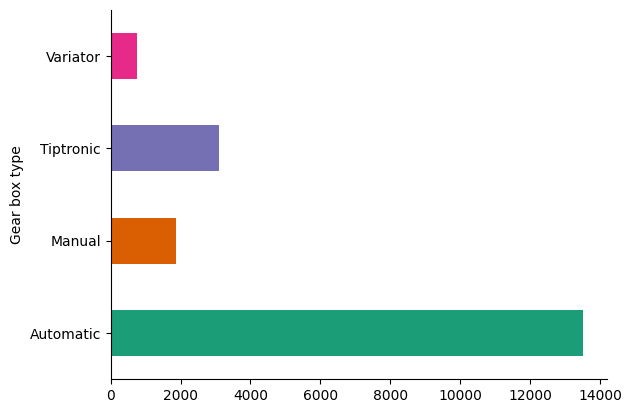

In [9]:
# Gear box type
import seaborn as sns
df.groupby('Gear box type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

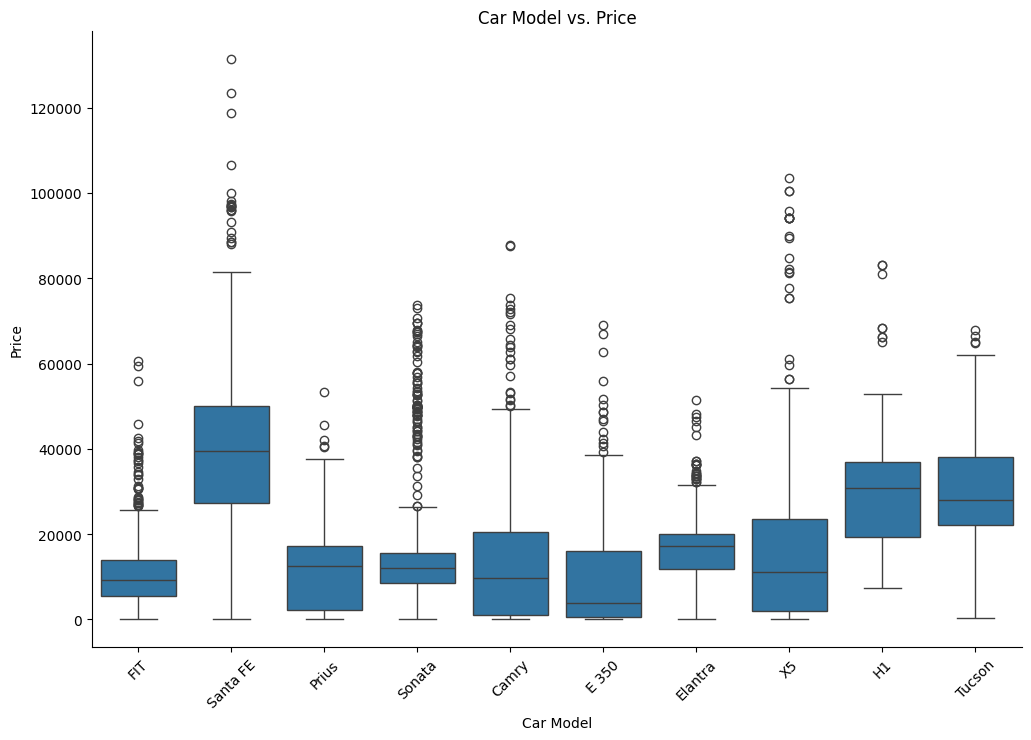

In [10]:
# Limit the number of car models shown (optional)
top_models = df['Model'].value_counts().nlargest(10).index
filtered_df = df[df['Model'].isin(top_models)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Price', data=filtered_df)
plt.title('Car Model vs. Price')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

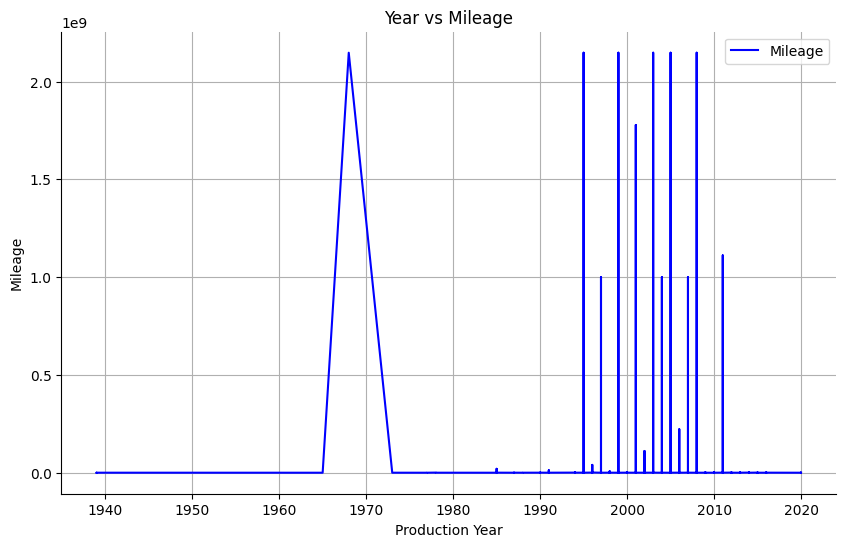

In [11]:
# Sort the dataframe by 'Prod. year' to plot the lines correctly
df = df.sort_values('Prod. year')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Prod. year'], df['Mileage'], color='blue', label='Mileage')
plt.xlabel('Production Year')
plt.ylabel('Mileage')
plt.title('Year vs Mileage')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add grid and legend
plt.grid(True)
plt.legend()
plt.show()

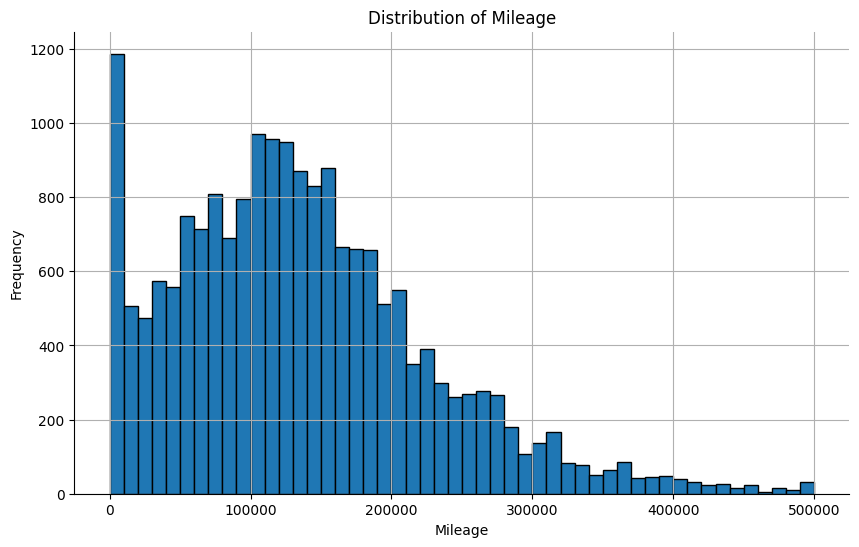

In [12]:
# Define the range of mileage values to plot (adjust as needed)
mileage_range = (0, 500000)  # Example: focusing on mileage values between 0 and 300,000 km

# Plot the histogram with specified range and adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(df['Mileage'], bins=50, range=mileage_range, edgecolor='black')  # Adjust bins and range
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage')
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

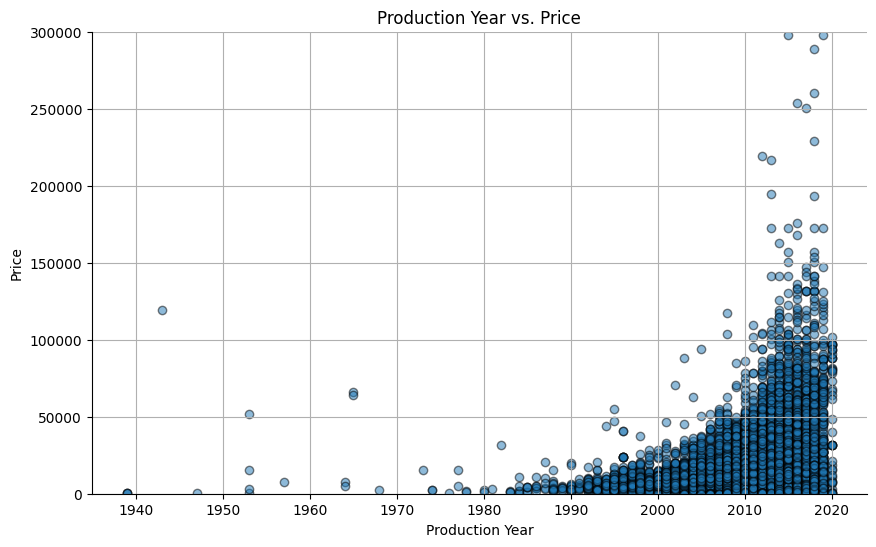

In [13]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Prod. year'], df['Price'], alpha=0.5, edgecolor='black')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Production Year vs. Price')
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

# Set the y-axis range
plt.ylim(0, 300000)

plt.show()

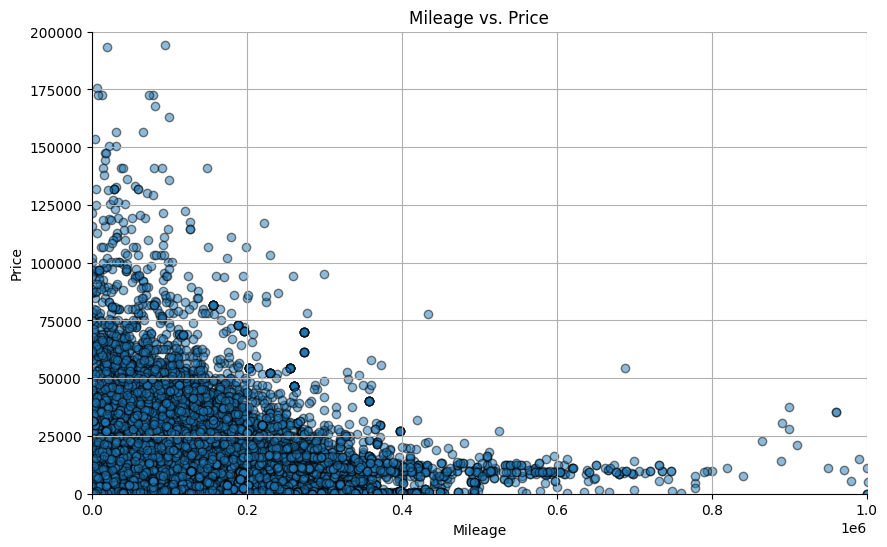

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Mileage'], df['Price'], alpha=0.5, edgecolor='black')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

# Set the y-axis range
plt.xlim(0, 1000000)
plt.ylim(0, 200000)

plt.show()

In [21]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
10265,26556126,157,-,ROLLS-ROYCE,Phantom,1939,Cabriolet,Yes,Petrol,5,129000,8.0,Automatic,Rear,04-May,Left wheel,Silver,0
15613,41720592,200,-,ROLLS-ROYCE,Phantom,1939,Limousine,Yes,Petrol,2.2,169000,4.0,Manual,Rear,04-May,Left wheel,White,0
11219,20746880,157,-,MERCEDES-BENZ,S 500,1939,Limousine,Yes,Petrol,2.4,126000,4.0,Automatic,Rear,04-May,Left wheel,White,0
6607,32171534,119172,-,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000,4.0,Automatic,Rear,04-May,Left wheel,White,0
12849,38169002,150,-,BMW,340,1947,Limousine,No,Petrol,2,165000,6.0,Manual,Rear,04-May,Left wheel,White,0


In [27]:
categorical_columns = ['Manufacturer','Model','Category','Leather interior','Fuel type','Gear box type','Drive wheels','Doors','Wheel','Color']

for col in categorical_columns:

    print(f"The categories in the '{col}' column are: {df[col].unique()}")

The categories in the 'Manufacturer' column are: ['ROLLS-ROYCE' 'MERCEDES-BENZ' 'BMW' 'MOSKVICH' 'GAZ' 'UAZ' 'FORD'
 'CHEVROLET' 'VAZ' 'OPEL' 'VOLKSWAGEN' 'SUZUKI' 'ZAZ' 'NISSAN' 'MAZDA'
 'MITSUBISHI' 'JEEP' 'HONDA' 'VOLVO' 'TOYOTA' 'DAIHATSU' 'AUDI'
 'LAND ROVER' 'RENAULT' 'FIAT' 'PEUGEOT' 'ROVER' 'HYUNDAI' 'DODGE' 'ISUZU'
 'SUBARU' 'LINCOLN' 'PORSCHE' 'LEXUS' 'JAGUAR' 'CADILLAC' 'INFINITI'
 'SEAT' 'ACURA' 'CHRYSLER' 'ALFA ROMEO' 'CITROEN' 'MINI' 'GMC' 'SAAB'
 'HUMMER' 'KIA' 'SKODA' 'სხვა' 'SCION' 'LANCIA' 'SSANGYONG' 'ASTON MARTIN'
 'SATURN' 'DAEWOO' 'MERCURY' 'PONTIAC' 'MASERATI' 'BUICK' 'FERRARI'
 'BENTLEY' 'GREATWALL' 'HAVAL' 'TESLA' 'LAMBORGHINI']
The categories in the 'Model' column are: ['Phantom' 'S 500' '230 W153' ... 'E-pace p200' 'Colorado'
 'G 65 AMG 63AMG']
The categories in the 'Category' column are: ['Cabriolet' 'Limousine' 'Sedan' 'Hatchback' 'Jeep' 'Coupe' 'Goods wagon'
 'Minivan' 'Microbus' 'Universal' 'Pickup']
The categories in the 'Leather interior' column are: ['